# 各モードのガイド波の到達予想時刻算出用プログラム

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import MaxNLocator
import os

## 150kHzの場合

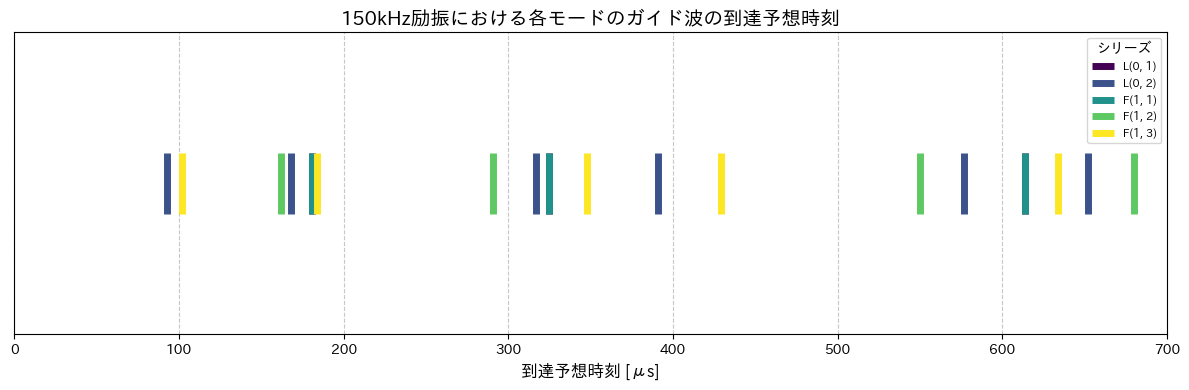

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------
# 1. データ準備
# -----------------
data = [
    [181, 93, 181, 162, 102],
    [325, 168, 325, 291, 184],
    [614, 317, 614, 550, 348],
    [758, 391, 758, 680, 429],
    [1119, 577, 1119, 1003, 634],
    [1264, 652, 1264, 1133, 716]
]

new_series_names = ['L(0, 1)', 'L(0, 2)', 'F(1, 1)', 'F(1, 2)', 'F(1, 3)']
df = pd.DataFrame(data, columns=new_series_names)
df_melted = df.melt(var_name='シリーズ', value_name='タイムスタンプ')

Y_FIXED_START = 0.4
Y_FIXED_END = 0.6

# -----------------
# 2. プロット作成
# -----------------

plt.figure(figsize=(12, 4)) 

series_names = df.columns
num_series = len(series_names)

# 【修正箇所】：
# 1. 'viridis' カラーマップオブジェクトを引数なしで取得します。
# 2. ループ内で使用するインデックス 'i' を色の総数 'num_series' で正規化します。
try:
    colors = plt.colormaps.get_cmap('viridis')
except AttributeError:
    # 互換性のため、古いバージョンで動作する plt.get_cmap をフォールバックとして使用
    colors = plt.get_cmap('viridis')


# 各シリーズのデータに対して縦線を描画 (vlinesを使用)
for i, series in enumerate(series_names):
    series_data = df_melted[df_melted['シリーズ'] == series]
    
    # 正規化されたインデックス (0から1の範囲) を計算
    # これをカラーマップ関数に渡すことで、グラデーションから対応する色を取得
    normalized_index = i / (num_series - 1) if num_series > 1 else 0.5
    
    plt.vlines(
        x=series_data['タイムスタンプ'],
        ymin=Y_FIXED_START,
        ymax=Y_FIXED_END,
        # カラーマップ関数に正規化されたインデックスを渡して色を取得
        color=colors(normalized_index),
        linewidth=5,
        label=series
    )

# 軸ラベルとタイトルを設定
plt.xlabel('到達予想時刻 [μs]', fontsize=12)
title_name = '150kHz励振における各モードのガイド波の到達予想時刻'
plt.title(title_name, fontsize=14)

# Y軸の設定
plt.yticks([])
plt.ylabel('')
plt.ylim(0, 1) 
plt.xlim(0, 700)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.legend(loc='upper right', title='シリーズ', fontsize=8)
plt.xlim(0, 700)
plt.tight_layout() 
plt.savefig(title_name + '.png')
# plt.show()

## 200kHzの場合

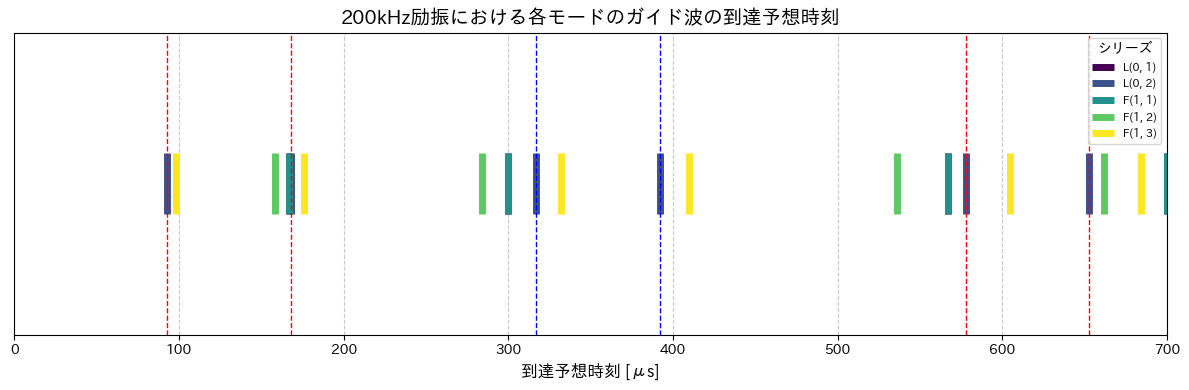

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------
# 1. データ準備
# -----------------
data = [
    [167, 93, 167, 158, 98],
    [300, 168, 300, 284, 176],
    [567, 317, 567, 536, 332],
    [700, 392, 700, 662, 410],
    [1033, 578, 1033, 978, 605],
    [1167, 653, 1167, 1104, 684]
]

new_series_names = ['L(0, 1)', 'L(0, 2)', 'F(1, 1)', 'F(1, 2)', 'F(1, 3)']
df = pd.DataFrame(data, columns=new_series_names)
df_melted = df.melt(var_name='シリーズ', value_name='タイムスタンプ')

Y_FIXED_START = 0.4
Y_FIXED_END = 0.6

# -----------------
# 2. プロット作成
# -----------------

plt.figure(figsize=(12, 4)) 

series_names = df.columns
num_series = len(series_names)

# 【修正箇所】：
# 1. 'viridis' カラーマップオブジェクトを引数なしで取得します。
# 2. ループ内で使用するインデックス 'i' を色の総数 'num_series' で正規化します。
try:
    colors = plt.colormaps.get_cmap('viridis')
except AttributeError:
    # 互換性のため、古いバージョンで動作する plt.get_cmap をフォールバックとして使用
    colors = plt.get_cmap('viridis')


# 各シリーズのデータに対して縦線を描画 (vlinesを使用)
for i, series in enumerate(series_names):
    series_data = df_melted[df_melted['シリーズ'] == series]
    
    # 正規化されたインデックス (0から1の範囲) を計算
    # これをカラーマップ関数に渡すことで、グラデーションから対応する色を取得
    normalized_index = i / (num_series - 1) if num_series > 1 else 0.5
    
    plt.vlines(
        x=series_data['タイムスタンプ'],
        ymin=Y_FIXED_START,
        ymax=Y_FIXED_END,
        # カラーマップ関数に正規化されたインデックスを渡して色を取得
        color=colors(normalized_index),
        linewidth=5,
        label=series
    )

# 配管由来のガイド波の予想時刻
x_lines = [93, 168, 578, 653]
for x in x_lines:
    plt.axvline(x=x, color='red', linestyle='--', linewidth=1) 
    # plt.text(x, -0.02, f'{x}μs', color='red', fontsize=10, ha='center')

# 欠陥の到達予想時刻
x_lines_defect = [317, 392]
for x in x_lines_defect:
    plt.axvline(x=x, color='blue', linestyle='--', linewidth=1) 

# 軸ラベルとタイトルを設定
plt.xlabel('到達予想時刻 [μs]', fontsize=12)
title_name = '200kHz励振における各モードのガイド波の到達予想時刻'
plt.title(title_name, fontsize=14)

# Y軸の設定
plt.yticks([])
plt.ylabel('')
plt.ylim(0, 1) 
plt.xlim(0, 700)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.legend(loc='upper right', title='シリーズ', fontsize=8)
plt.xlim(0, 700)
plt.tight_layout() 
plt.savefig(title_name + '.png')
# plt.show()

## 200kHz励振における各モードのガイド波の到達予想時刻

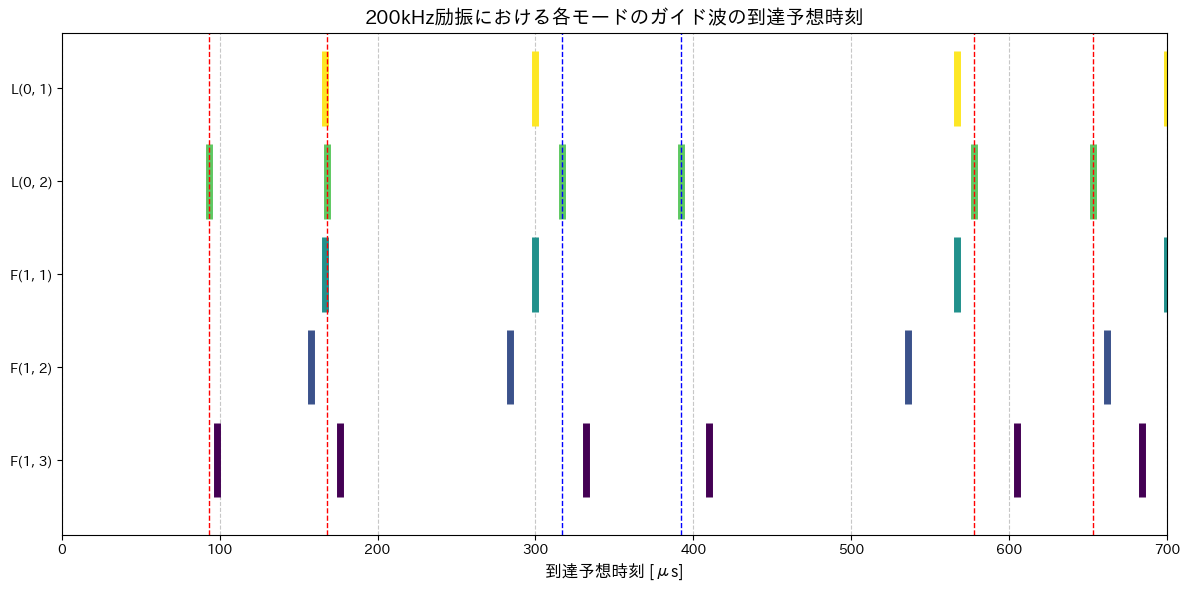

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------
# 1. データ準備
# -----------------
data = [
    [167, 93, 167, 158, 98],
    [300, 168, 300, 284, 176],
    [567, 317, 567, 536, 332],
    [700, 392, 700, 662, 410],
    [1033, 578, 1033, 978, 605],
    [1167, 653, 1167, 1104, 684]
]

new_series_names = ['L(0, 1)', 'L(0, 2)', 'F(1, 1)', 'F(1, 2)', 'F(1, 3)']
df = pd.DataFrame(data, columns=new_series_names)
df_melted = df.melt(var_name='シリーズ', value_name='タイムスタンプ')

# -----------------
# 2. プロット作成
# -----------------
plt.figure(figsize=(12, 6))

series_names = df.columns
num_series = len(series_names)

try:
    colors = plt.colormaps.get_cmap('viridis')
except AttributeError:
    colors = plt.get_cmap('viridis')

# ★★ シリーズごとに縦位置を変えるための設定 ★★
ROW_HEIGHT = 0.12
GAP = 0.03

for i, series in enumerate(series_names[::-1]):
    series_data = df_melted[df_melted['シリーズ'] == series]

    # シリーズごとの Y 座標帯
    ymin = i * (ROW_HEIGHT + GAP)
    ymax = ymin + ROW_HEIGHT

    # 色
    normalized_index = i / (num_series - 1) if num_series > 1 else 0.5

    # vlines を縦位置ごとに表示
    plt.vlines(
        x=series_data['タイムスタンプ'],
        ymin=ymin,
        ymax=ymax,
        color=colors(normalized_index),
        linewidth=5,
        label=series
    )

# ガイド波の予想時刻（赤線）
x_lines = [93, 168, 578, 653]
for x in x_lines:
    plt.axvline(x=x, color='red', linestyle='--', linewidth=1)

# 欠陥の到達予想時刻（青線）
x_lines_defect = [317, 392]
for x in x_lines_defect:
    plt.axvline(x=x, color='blue', linestyle='--', linewidth=1)

# 軸ラベルとタイトル
plt.xlabel('到達予想時刻 [μs]', fontsize=12)
title_name = '200kHz励振における各モードのガイド波の到達予想時刻'
plt.title(title_name, fontsize=14)

# Y軸調整
plt.yticks(
    [i * (ROW_HEIGHT + GAP) + ROW_HEIGHT/2 for i in range(num_series)],
    series_names[::-1],
    fontsize=10
)

extra_space = ROW_HEIGHT / 2
plt.ylim(-extra_space, num_series * (ROW_HEIGHT + GAP))
plt.xlim(0, 700)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(title_name + '.png')
# plt.show()


## 250kHzの場合

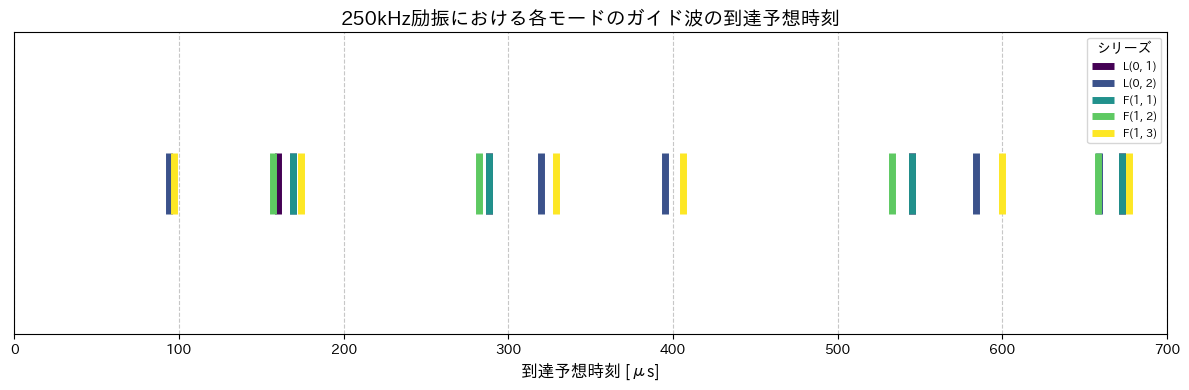

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------
# 1. データ準備
# -----------------
data = [
    [160, 94, 169, 157, 97],
    [288, 169, 288, 282, 174],
    [545, 320, 545, 533, 329],
    [673, 395, 673, 658, 406],
    [994, 584, 994, 972, 600],
    [1122, 659, 1122, 1097, 677]
]

new_series_names = ['L(0, 1)', 'L(0, 2)', 'F(1, 1)', 'F(1, 2)', 'F(1, 3)']
df = pd.DataFrame(data, columns=new_series_names)
df_melted = df.melt(var_name='シリーズ', value_name='タイムスタンプ')

Y_FIXED_START = 0.4
Y_FIXED_END = 0.6

# -----------------
# 2. プロット作成
# -----------------

plt.figure(figsize=(12, 4)) 

series_names = df.columns
num_series = len(series_names)

# 【修正箇所】：
# 1. 'viridis' カラーマップオブジェクトを引数なしで取得します。
# 2. ループ内で使用するインデックス 'i' を色の総数 'num_series' で正規化します。
try:
    colors = plt.colormaps.get_cmap('viridis')
except AttributeError:
    # 互換性のため、古いバージョンで動作する plt.get_cmap をフォールバックとして使用
    colors = plt.get_cmap('viridis')


# 各シリーズのデータに対して縦線を描画 (vlinesを使用)
for i, series in enumerate(series_names):
    series_data = df_melted[df_melted['シリーズ'] == series]
    
    # 正規化されたインデックス (0から1の範囲) を計算
    # これをカラーマップ関数に渡すことで、グラデーションから対応する色を取得
    normalized_index = i / (num_series - 1) if num_series > 1 else 0.5
    
    plt.vlines(
        x=series_data['タイムスタンプ'],
        ymin=Y_FIXED_START,
        ymax=Y_FIXED_END,
        # カラーマップ関数に正規化されたインデックスを渡して色を取得
        color=colors(normalized_index),
        linewidth=5,
        label=series
    )

# 軸ラベルとタイトルを設定
plt.xlabel('到達予想時刻 [μs]', fontsize=12)
title_name = '250kHz励振における各モードのガイド波の到達予想時刻'
plt.title(title_name, fontsize=14)

# Y軸の設定
plt.yticks([])
plt.ylabel('')
plt.ylim(0, 1) 
plt.xlim(0, 700)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.legend(loc='upper right', title='シリーズ', fontsize=8)
plt.xlim(0, 700)
plt.tight_layout() 
plt.savefig('./timestamp' + title_name + '.png')
# plt.show()